<a href="https://colab.research.google.com/github/1012357482/cienciaDatosETITC/blob/clas_supervisado_noticias/Copia_de_clas_supervisada_noticias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clasificación de Noticias Utilizando Técnicas de Procesamiento del Lenguaje Natural.
**Autor original: Carlos Zainea**\
**Modificado por: Elias Buitrago B.**\
Bogotá, Colombia \
Actualizado: 30 oct 2023 \
_Nota: Código ajustado para su ejecución en Google Colaboratory_\
Actualizado para las versiones recientes de las librerías, pero no se encuentra depurado respecto a la versión original del año 2020_

In [ ]:
!pip install stop-words

  Preparing metadata (setup.py) ... done
  Created wheel for stop-words: filename=stop_words-2018.7.23-py3-none-any.whl size=32898 sha256=3bcb36820431bd024ef4a16271e4ca02495df6f0c4552cee5c03468b27dfb748
  Stored in directory: /root/.cache/pip/wheels/d0/1a/23/f12552a50cb09bcc1694a5ebb6c2cd5f2a0311de2b8c3d9a89
Successfully built stop-words


Esta libreria es la encargada de eliminar de un texto palabra comunes que no aportan nada al significado en un contexto en especificio

In [ ]:
import re  # Trabajo con expresiones regulares, patrones de búsqueda y manipulación
import pandas as pd  # Analisis y manipulación de datos.
import nltk  # Biblioteca de procesamiento de lenguaje natural de python.
nltk.download('punkt') #Tokenización , se usa para dividir palabras, es el conjunto de palabras que uso para tokenizar.
import numpy as np # Utilizado para realizar calculos núemricos
from bs4 import BeautifulSoup # Se usa para analizar y extraer informacion  de documentos html y xml
from PIL import Image # Se usa para trabajar con imagenes en python
from urllib.request import urlopen #Se usa para abrir url's y obtener recursos web
from wordcloud import WordCloud, ImageColorGenerator # Se usa para crear nubes de palabras a partir de texto **
from stop_words import get_stop_words # Utilizada para obtener paralabras de parada de un idioma en especifico
import matplotlib.pyplot as plt # Utilizada para mostrar las imagenes en linea para un cuaderno de jupyter
%matplotlib inline

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Noticiastrain=pd.read_excel("/content/drive/MyDrive/HSM/Noticias2ver.xlsx",index_col=0)

In [ ]:
pd.value_counts(Noticiastrain['Tipo']) # Se cuentanlos valores unicos en la columna tipo

Variedades            244
colombia              181
Politica y Opinion    125
deportes              113
mundo                 101
Justicia               73
bogota                 60
economia               51
salud                  27
Name: Tipo, dtype: int64

In [ ]:
# from nltk.corpus import stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords=set(stopwords.words('spanish'))
from gensim.test.utils import common_texts, get_tmpfile  # common_Text lista de texto para entrenar conjunto de palabras, proporciona palabras comunes de un determinado idioma **
from gensim.models import Word2Vec # get_tmpfile crea archivos temporales.
path = get_tmpfile("word2vec.model") # ubicación fisica del archivo temporal

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
Noticias2=[]  # se crea una lista vacia
try:
    for i in Noticiastrain["contenido"]:   #Se itera en la columna contenido dataset
        Noticias2.append(re.sub( "[^A-Za-zóáéíúÁÉÍÓÚüÜñ.]+",' ',i)) # busca cualquier valor que no sea una letra mayuscula o minuscula y lo elimina dicho de otra forma borra valores inusuales en este contexto.
except Exception:
    pass # Indica que no se debe tomar ningun tipo de acción.

In [ ]:
Noticiasinparada=[] # una lista donde se alamacenaran la palabras despues de eliminar las palabras de parada.
for i in range(len(Noticias2)):
    Noticiasinparada.append([j.lower() for j in Noticias2[i].split() if not j.lower() in stopwords])

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
model = Word2Vec(Noticiasinparada, vector_size=100, window=10, min_count=1, workers=4)
    #Noticiasinparada, # Conjunto de palabras sin paradas en su texto
     # vector_size=100,  # Tamaño de os vectores de palabras. "100-300"
      #  window=10,   # Tamaño de la ventana de contexto alrededor de cada palabran número de palabras vecinas es decir  10 a la derecha y 10 a la izquierda..
       # min_count=1,  # (Recuente mínimo) Para el caso 1, es el número minimo de veces que debe aparacer una palabra para ser considerada en el modelo.
        # workers=4)  # Número de núcleos de CPU utilizados para el entrenamiento (paralelización)
# IMPORTANTE este hiperparametro define que tanta conexión semantica tendran las paalbras(Clusterirn de palabras).
model.save("word2vec.model")#Guardamos el modelo entrenado en un archivo

In [ ]:
model = Word2Vec.load("word2vec.model")
model.wv.index_to_key

['cuarentena',
 'p.m.',
 '.',
 'coronavirus',
 'santa',
 '...',
 'país',
 'colombia',
 'hacer',
 'ahora',
 'gente',
 'pico',
 'personas',
 'pasó',
 'modelo',
 'bucaramanga',
 'cédula',
 'marta',
 'si',
 'clientes',
 'sitios',
 'piden',
 'bahía',
 'sexuales',
 'webcam',
 'cumpla',
 'luce',
 'so',
 'conejo',
 'elena',
 'desnudarse',
 'consolar',
 'fantasías',
 'multada',
 'implementan',
 'cristalina',
 'puede',
 'salud',
 'ser',
 'tiempo',
 'covid',
 'gobierno',
 'policía',
 'años',
 'ciudadanos',
 'así',
 'trata',
 'dos',
 'según',
 'casos',
 'solo',
 'además',
 'pandemia',
 'antioquia',
 'empresa',
 'departamentos',
 'confinamiento',
 'alcohol',
 'aplicar',
 'días',
 'nacional',
 'comparendos',
 'llegará',
 'cartagena',
 'parte',
 'medidas',
 'fla',
 'antiséptico',
 'dijo',
 'baja',
 'generación',
 'hace',
 'conductores',
 'millones',
 'c',
 'masivo',
 'momento',
 'mundo',
 'bogotá',
 'cuenta',
 'residuos',
 'sustenta',
 'cada',
 'despido',
 'tener',
 'barrenderos',
 'crisis',
 'despid

In [ ]:
import pickle # utilizado para serializar y deserializar objetos en python
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer # convertir documentos de texto en representaciones númericas.
from sklearn.linear_model import LogisticRegression # algoritmo de clasificación multicalse y binaria.
from pprint import pprint # utilizado para mostrar configuraciones hiperparametros
from sklearn.model_selection import RandomizedSearchCV # busca hiperparametros en un modelo de manera aleatoria y con efectividad
from sklearn.model_selection import GridSearchCV # busca hiperparametros y realiza todas las convinacione posibles.
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score # Evalua el rendimiento del modelo lo representa con matriz de confusión.
from sklearn.model_selection import ShuffleSplit # Realiza la validación cruzada aleatoria **
import matplotlib.pyplot as plt
import seaborn as sns # visualizaciones mas esteticas para matplotlib
import pandas as pd



In [ ]:
Cat=list(Noticiastrain["Tipo"].value_counts().index)
Cat
#Crea un lista con todas las categorias unicas de la columna tipo de dataframe

['Variedades',
 'colombia',
 'Politica y Opinion',
 'deportes',
 'mundo',
 'Justicia',
 'bogota',
 'economia',
 'salud']

In [ ]:
dictCodeCat={Cat[i]:i for i in range(len(Cat))}
dictCodeCat

#Crea un diccionario en dode el valor unico o llave son los valores de Cat y su value o valor es la posición en esa lista.

{'Variedades': 0,
 'colombia': 1,
 'Politica y Opinion': 2,
 'deportes': 3,
 'mundo': 4,
 'Justicia': 5,
 'bogota': 6,
 'economia': 7,
 'salud': 8}

In [ ]:
CodeCat=[Cat.index(i) for i in Noticiastrain["Tipo"]]
Noticiastrain["Tipo"]
#CodeCat
#Se crea una lista en la que los valores del dataframe en la columna tipo se homologan con los valores de la la lista cat en su representación numerica value de la lista dictCodeCat

Columna1
0                economia
1      Politica y Opinion
2              Variedades
3                  bogota
4      Politica y Opinion
              ...        
970              economia
971              Justicia
972    Politica y Opinion
973              colombia
974                 mundo
Name: Tipo, Length: 975, dtype: object

In [ ]:
NoticiasinparadaC=[" ".join(i) for i in Noticiasinparada]
#NoticiasinparadaC
#Crea una nueva lista uniendo las sublistas sin parada con el valor " "

In [ ]:
DF=pd.DataFrame({"Contenido_limpio":NoticiasinparadaC,"Tipo":Noticiastrain["Tipo"],"CodeCat":CodeCat})
#Creo un dataframe nuevo sin las palabra de parada, concervo la columna tipo, y la columna tipo de categoria de la lista Cat(categoria)

In [ ]:
DF

,Contenido_limpio,Tipo,CodeCat
Columna1,,,
0,medio coyuntura ocasionada propagación coronav...,economia,7
1,jueves noveno día cuarentena nacional presiden...,Politica y Opinion,2
2,jenny prieto álex caro pareja cultivadores jen...,Variedades,0
3,aunque secretaría educación recomendó padres f...,bogota,6
4,presidente congreso lidio garcía anunció próxi...,Politica y Opinion,2
...,...,...,...
970,frente medidas preventivas dispuesto gobierno ...,economia,7
971,agosto año pasado hombre años presentó tutela ...,Justicia,5
972,presidente iván duque aseguró entrevista pregu...,Politica y Opinion,2


In [ ]:
# Se dividen los conjuntos de datos en entrenamiento y prueba

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(DF['Contenido_limpio'], # Representa los datos de entrada en el modelo
                                                    DF['CodeCat'], # Variable destino que se utilizara para entrenar o evaluar el modelo.
                                                    test_size=0.15, # indica que se utilizaran el 15% de los datos para el entrenamiento.
                                                    random_state=8) # Este valro de 8 representa la semilla de alietoriedad, la cual es reproducible siempre con el valor 8.

In [ ]:
# Se hace la transformación de texto en representaciones numéricas utilizando el esquema TF-IDF (Term Frequency-Inverse Document Frequency)
# Es un valor numerica para cada palabra la cual representa la importancia en el documento.
#TF mide la frecuencia con que aparece una palabra en un texto. en terminos de porcentaje
#IDF frecuandi inversa de documento, mide la importancia de la palabra en el documento.


from sklearn.feature_extraction.text import TfidfVectorizer # se utiliza para convertir texto en representaciones numéricas utilizando el esquema TF-IDF

tfidf = TfidfVectorizer(encoding='utf-8',  # tipo de codificación para los caractres
                        stop_words=None,   # no se eliminaran palabra de parada en el modelo
                        lowercase=False,  # Sera sensible a mayusculas y minusculas
                        ngram_range = (1,2),  #se consideraran paalbra individuales y agrupadas de ados
                        max_df=10, # Estable que palabra que aparezca u ocupen el 10% sera consideras de parada y se eliminara.
                        min_df=1, #Numere de documentos en los que minimo  debe aparecer una palabra para ser consideradas por el modelo.
                        max_features=300, # se seleccionarar las 300 mehores caracteristicas en este caso las mas importantes
                        norm='l2', # Noramlización L2 euclidiana
                        sublinear_tf=True) # aplica una transformación logaritmica

features_train = tfidf.fit_transform(X_train).toarray() #aplica la transformación a los datos de entrenamiento
labels_train = y_train
print(features_train.shape)
#(numero de elementos en el conjunto de entrenamiento, numero de caracteristicas del vector.)

features_test = tfidf.transform(X_test).toarray()
labels_test = y_test
print(features_test.shape)
#(numero de elementos en el conjunto de prueba, numero de caracteristicas del vector.)



(828, 300)
(147, 300)


In [ ]:
#Utilizado para calcular los unigramas o bigramsa de palabras
# Se hara uso de la prueba chi2 para medir la independencia entre dos variables categoricas

from sklearn.feature_selection import chi2
import numpy as np

for Product, category_id in sorted(dictCodeCat.items()):
  features_chi2 = chi2(features_train, labels_train == category_id)
  indices = np.argsort(features_chi2[0]) # ordena las caracteristica por el valor de la prueba chi2 en orden ascendente
  feature_names = np.array(tfidf.get_feature_names_out())[indices]
  # divide las caracteristicas en unigramas y bigramas
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}' category:".format(Product))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-5:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-2:])))
  print("")
  #imprime los unigramas y bigramas relacionados con las palabras.

# 'Justicia' category:
  . Most correlated unigrams:
. extradición
. vuelo
. tribunal
. prisiones
. carcelaria
  . Most correlated bigrams:
. fiscalía general
. corte suprema

# 'Politica y Opinion' category:
  . Most correlated unigrams:
. prepararnos
. promotores
. congresista
. sesionar
. senadores
  . Most correlated bigrams:
. sesiones virtuales
. señor director

# 'Variedades' category:
  . Most correlated unigrams:
. banda
. world
. apple
. microsoft
. videojuegos
  . Most correlated bigrams:
. aplicación spotify
. ministerio educación

# 'bogota' category:
  . Most correlated unigrams:
. intensivo
. homicidios
. arriendos
. bono
. ctpd
  . Most correlated bigrams:
. bogotá región
. contrato social

# 'colombia' category:
  . Most correlated unigrams:
. villavicencio
. ipiales
. valledupar
. cédulas
. gobernadora
  . Most correlated bigrams:
. fiscalía general
. cédulas terminadas

# 'deportes' category:
  . Most correlated unigrams:
. ligas
. fifa
. messi
. tour
. juventus
  . 

# Método: Clasificador Bayesiano

## Búsqueda mejores hiperparámetros utilizando RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import MultinomialNB

# Definir una distribución de hiperparámetros para buscar
param_dist = {
    'alpha': [0.1, 0.5, 1.0, 2.0, 5.0, 10.0, 15.0, 25.0], # Parámetro de suavizado Laplaciano
    'fit_prior': [True, False]                            # Si se debe aprender la probabilidad a priori de las clases
}

mnbc = MultinomialNB()
random_search = RandomizedSearchCV(estimator=mnbc, param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1, scoring='accuracy')
random_search.fit(features_train, labels_train)

# Hiperparámetros optimizados
best_params = random_search.best_params_
print("=^_^= =^_^= =^_^= =^_^==^_^= =^_^= =^_^= =^_^==^_^= =^_^= =^_^= =^_^==^_^= =^_^= =^_^= =^_^=")
print()
print()
print("*********************************  Hiperametros optimizados  *********************************  \n", best_params)
print()
print()
print("=^_^= =^_^= =^_^= =^_^==^_^= =^_^= =^_^= =^_^==^_^= =^_^= =^_^= =^_^==^_^= =^_^= =^_^= =^_^=")

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 16 is smaller than n_iter=100. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


=^_^= =^_^= =^_^= =^_^==^_^= =^_^= =^_^= =^_^==^_^= =^_^= =^_^= =^_^==^_^= =^_^= =^_^= =^_^=


*********************************  Hiperametros optimizados  *********************************  
 {'fit_prior': True, 'alpha': 0.1}


=^_^= =^_^= =^_^= =^_^==^_^= =^_^= =^_^= =^_^==^_^= =^_^= =^_^= =^_^==^_^= =^_^= =^_^= =^_^=


## Búsqueda mejores hiperparámetros utilizando GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

# Definir una cuadrícula de hiperparámetros para buscar
param_grid = {
    'alpha': [0.1, 1.0, 10.0],  # Parámetro de suavizado Laplaciano
    'fit_prior': [True, False]  # Si se debe aprender la probabilidad a priori de las clases
}

mnbc = MultinomialNB()
grid_search = GridSearchCV(estimator=mnbc, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

grid_search.fit(features_train, labels_train)
best_params = grid_search.best_params_
print("=^_^= =^_^= =^_^= =^_^==^_^= =^_^= =^_^= =^_^==^_^= =^_^= =^_^= =^_^==^_^= =^_^= =^_^= =^_^=")
print()
print()
print("*********************************  Hiperametros optimizados  *********************************  \n", best_params)
print()
print()
print("=^_^= =^_^= =^_^= =^_^==^_^= =^_^= =^_^= =^_^==^_^= =^_^= =^_^= =^_^==^_^= =^_^= =^_^= =^_^=")




=^_^= =^_^= =^_^= =^_^==^_^= =^_^= =^_^= =^_^==^_^= =^_^= =^_^= =^_^==^_^= =^_^= =^_^= =^_^=


*********************************  Hiperametros optimizados  *********************************  
 {'alpha': 0.1, 'fit_prior': True}


=^_^= =^_^= =^_^= =^_^==^_^= =^_^= =^_^= =^_^==^_^= =^_^= =^_^= =^_^==^_^= =^_^= =^_^= =^_^=


## Se aplican los hiperparámetros considerando los valores encontrados:

In [ ]:
from sklearn.naive_bayes import MultinomialNB  # Se importa un clasificador bayesiano, el cual se usa para la clasificación de texto
from pprint import pprint # Se utiliza para imprimir datos de manera más legible
from sklearn.model_selection import RandomizedSearchCV # Búqueda de hiperparametros
from sklearn.model_selection import GridSearchCV # Busqueda de hiperparámeetros
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score #Es un informe detallado de métricas de clasificación como precisión y puntuación F1, Calcula la matrix de confusión, Calcular la precisión del modelo.
from sklearn.model_selection import ShuffleSplit #Se encarga de realizar la validación cruzada
import matplotlib.pyplot as plt
import seaborn as sns #utiliza para mejorar la estética de las visualizaciones y gráficos creados con Matplotlib.

mnbc = MultinomialNB(fit_prior=True, alpha=0.1 )# Esta instancia del clasificador se utilizará para entrenar y evaluar el modelo de clasificación bayesiano ingenuo multinomial.
mnbc

MultinomialNB(alpha=0.1)

In [ ]:
mnbc.fit(features_train, labels_train)
# aca se pasan como paramtros
#los vectores de caracteristicas
#las etiquetas o categorías a las que pertenecen los ejemplos de entrenamiento. Estas etiquetas indican la categoría a la que pertenece cada ejemplo de texto en los datos de entrenamiento.

MultinomialNB(alpha=0.1)

In [ ]:
mnbc_pred = mnbc.predict(features_test) # Se utilizara para hacer pruebas sobre los datos de de prueba

In [ ]:
# Training accuracy
print("The training accuracy is: ")
print(accuracy_score(labels_train, mnbc.predict(features_train))) #PRECISIÓN DEL MODELO CON LOS DATOS DE ENTRENAMIENTO

The training accuracy is: 
0.6799516908212561


In [ ]:
# Test accuracy
print("The test accuracy is: ")
print(accuracy_score(labels_test, mnbc_pred))  # PRECISIÓN DEL MODELO CON LOS DATOS DE PRUEBA

The test accuracy is: 
0.4013605442176871


In [ ]:
# Classification report
print("Classification report")
print(classification_report(labels_test,mnbc_pred))

Classification report
              precision    recall  f1-score   support

           0       0.32      0.77      0.45        30
           1       0.48      0.41      0.44        29
           2       0.23      0.14      0.18        21
           3       0.80      0.50      0.62        16
           4       0.50      0.35      0.41        17
           5       0.40      0.14      0.21        14
           6       0.40      0.25      0.31         8
           7       0.75      0.33      0.46         9
           8       0.00      0.00      0.00         3

    accuracy                           0.40       147
   macro avg       0.43      0.32      0.34       147
weighted avg       0.44      0.40      0.38       147



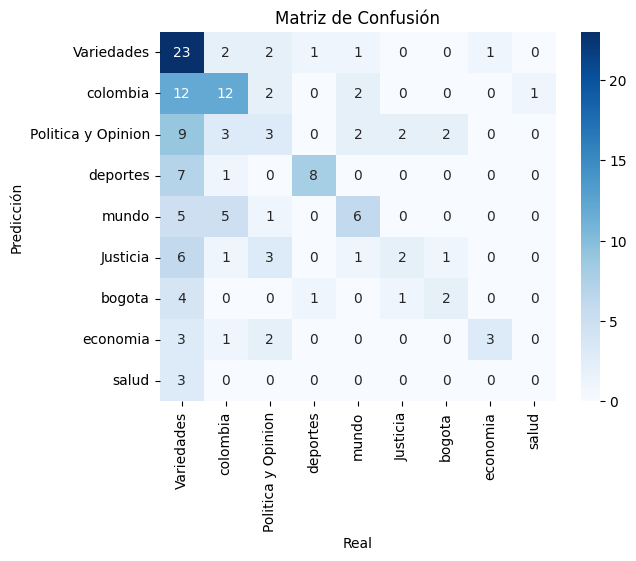

In [ ]:
aux_df = DF[['Tipo', 'CodeCat']].drop_duplicates().sort_values('CodeCat')
conf_matrix = confusion_matrix(labels_test, mnbc_pred)
plt.figure()
sns.heatmap(conf_matrix,
            annot=True,
            xticklabels=aux_df['Tipo'].values,
            yticklabels=aux_df['Tipo'].values,
            cmap="Blues")
plt.ylabel('Predicción')
plt.xlabel('Real')
plt.title('Matriz de Confusión')
plt.show()



# Método: Regresión Lógistica

## Búsqueda mejores hiperparámetros utilizando GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

# Definir una cuadrícula de hiperparámetros para buscar
param_grid = {
    'C': [1, 10, 100, 1000, 1000],  # Parámetro de regularización
    'penalty': ['l1', 'l2'],  # Tipo de regularización
    'max_iter': [100, 200, 300, 400, 500]  # Número máximo de iteraciones
}

mnbc = LogisticRegression(random_state=8)
grid_search = GridSearchCV(estimator=mnbc, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(features_train, labels_train)
best_params = grid_search.best_params_
print("=^_^= =^_^= =^_^= =^_^==^_^= =^_^= =^_^= =^_^==^_^= =^_^= =^_^= =^_^==^_^= =^_^= =^_^= =^_^=")
print()
print()
print("*********************************  Hiperametros optimizados  *********************************  \n", best_params)
print()
print()
print("=^_^= =^_^= =^_^= =^_^==^_^= =^_^= =^_^= =^_^==^_^= =^_^= =^_^= =^_^==^_^= =^_^= =^_^= =^_^=")

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
125 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
125 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: So

=^_^= =^_^= =^_^= =^_^==^_^= =^_^= =^_^= =^_^==^_^= =^_^= =^_^= =^_^==^_^= =^_^= =^_^= =^_^=


*********************************  Hiperametros optimizados  *********************************  
 {'C': 10, 'max_iter': 100, 'penalty': 'l2'}


=^_^= =^_^= =^_^= =^_^==^_^= =^_^= =^_^= =^_^==^_^= =^_^= =^_^= =^_^==^_^= =^_^= =^_^= =^_^=


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Búsqueda mejores hiperparámetros utilizando RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats

# Definir una distribución de hiperparámetros para buscar
param_dist = {
    'C': scipy.stats.expon(scale=10),
    'penalty': ['l1', 'l2'],
    'max_iter': [100, 200, 300, 400, 500]
}

mnbc = LogisticRegression(random_state=8)
random_search = RandomizedSearchCV(estimator=mnbc, param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1, scoring='accuracy')
random_search.fit(features_train, labels_train)

# Se obtiene los hiperparámetros más optimo
best_params = random_search.best_params_

print("=^_^= =^_^= =^_^= =^_^==^_^= =^_^= =^_^= =^_^==^_^= =^_^= =^_^= =^_^==^_^= =^_^= =^_^= =^_^=")
print()
print()
print("*********************************  Hiperametros optimizados  *********************************  \n", best_params)
print()
print()
print("=^_^= =^_^= =^_^= =^_^==^_^= =^_^= =^_^= =^_^==^_^= =^_^= =^_^= =^_^==^_^= =^_^= =^_^= =^_^=")




=^_^= =^_^= =^_^= =^_^==^_^= =^_^= =^_^= =^_^==^_^= =^_^= =^_^= =^_^==^_^= =^_^= =^_^= =^_^=


*********************************  Hiperametros optimizados  *********************************  
 {'C': 6.085935863357567, 'max_iter': 100, 'penalty': 'l2'}


=^_^= =^_^= =^_^= =^_^==^_^= =^_^= =^_^= =^_^==^_^= =^_^= =^_^= =^_^==^_^= =^_^= =^_^= =^_^=


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
280 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
280 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: So

## Se aplican los hiperparámetros considerando los valores encontrados:

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The training accuracy is: 
0.8309178743961353
Classification report
              precision    recall  f1-score   support

           0       0.50      0.57      0.53        30
           1       0.31      0.55      0.40        29
           2       0.12      0.10      0.11        21
           3       0.62      0.50      0.55        16
           4       0.27      0.18      0.21        17
           5       0.29      0.14      0.19        14
           6       0.50      0.38      0.43         8
           7       0.40      0.22      0.29         9
           8       0.00      0.00      0.00         3

    accuracy                           0.36       147
   macro avg       0.33      0.29      0.30       147
weighted avg       0.36      0.36      0.35       147



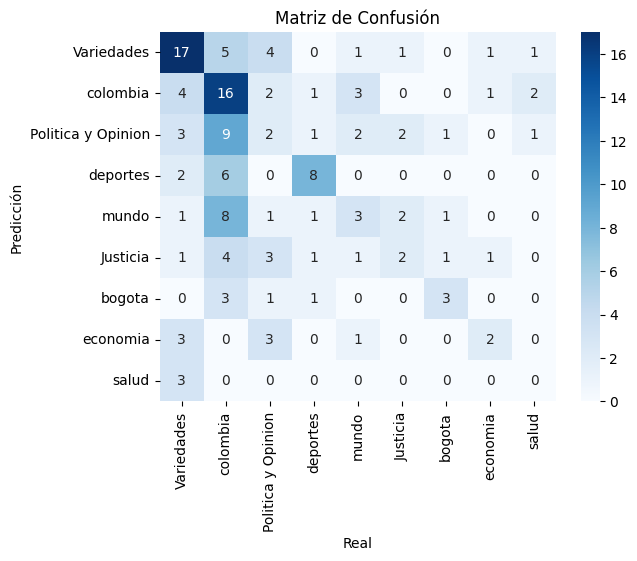

In [ ]:
from sklearn.linear_model import LogisticRegression  # Algorito de regresion lineal multiclase.

mnbc = LogisticRegression(C=100, penalty='l2', max_iter=100, random_state=8,)  # Se crea una instacia del modelo de regresión logistica además,se le proporciona una semilla de aletoriedad con vlaor de 8
mnbc
mnbc.fit(features_train, labels_train) # se entrena el modelo
mnbc_pred = mnbc.predict(features_test) # se uza el modelo ya entrenado para hacer predicciónes sobre el conjnto de prueba.
print("The training accuracy is: ")
print(accuracy_score(labels_train, mnbc.predict(features_train))) # Se calcula e imprime la precisión del modelo.
# Classification report
print("Classification report")
print(classification_report(labels_test,mnbc_pred)) # se imprimen metricas detalladas del modelo

aux_df = DF[['Tipo', 'CodeCat']].drop_duplicates().sort_values('CodeCat')  # se imprime la matriz de confusión
conf_matrix = confusion_matrix(labels_test, mnbc_pred)
plt.figure()
sns.heatmap(conf_matrix,
            annot=True,
            xticklabels=aux_df['Tipo'].values,
            yticklabels=aux_df['Tipo'].values,
            cmap="Blues")
plt.ylabel('Predicción')
plt.xlabel('Real')
plt.title('Matriz de Confusión')
plt.show()


# Método: K-Vecionos más cercanos

## Búsqueda mejores hiperparámetros utilizando RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Definir una distribución de hiperparámetros para buscar
param_dist = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

mnbc = KNeighborsClassifier()
random_search = RandomizedSearchCV(estimator=mnbc, param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1, scoring='accuracy')
random_search.fit(features_train, labels_train)

# Obtener los mejores hiperparámetros
best_params = random_search.best_params_
print("=^_^= =^_^= =^_^= =^_^==^_^= =^_^= =^_^= =^_^==^_^= =^_^= =^_^= =^_^==^_^= =^_^= =^_^= =^_^=")
print()
print()
print("*********************************  Hiperametros optimizados  *********************************  \n", best_params)
print()
print()
print("=^_^= =^_^= =^_^= =^_^==^_^= =^_^= =^_^= =^_^==^_^= =^_^= =^_^= =^_^==^_^= =^_^= =^_^= =^_^=")





/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 40 is smaller than n_iter=100. Running 40 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


=^_^= =^_^= =^_^= =^_^==^_^= =^_^= =^_^= =^_^==^_^= =^_^= =^_^= =^_^==^_^= =^_^= =^_^= =^_^=


*********************************  Hiperametros optimizados  *********************************  
 {'weights': 'distance', 'p': 2, 'n_neighbors': 6}


=^_^= =^_^= =^_^= =^_^==^_^= =^_^= =^_^= =^_^==^_^= =^_^= =^_^= =^_^==^_^= =^_^= =^_^= =^_^=


## Búsqueda mejores hiperparámetros utilizando GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Definir una cuadrícula de hiperparámetros para buscar
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9],  # Número de vecinos
    'weights': ['uniform', 'distance'],  # Peso de los vecinos
    'p': [1, 2]  # Parámetro de distancia (1 para Manhattan, 2 para Euclidiana)
}

# Crear una instancia del modelo K-NN
mnbc = KNeighborsClassifier()

# Crear un objeto GridSearchCV
grid_search = GridSearchCV(estimator=mnbc, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Búsqueda de los mejores hiperametros
grid_search.fit(features_train, labels_train)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
print("=^_^= =^_^= =^_^= =^_^==^_^= =^_^= =^_^= =^_^==^_^= =^_^= =^_^= =^_^==^_^= =^_^= =^_^= =^_^=")
print()
print()
print("*********************************  Hiperametros optimizados  *********************************  \n", best_params)
print()
print()
print("=^_^= =^_^= =^_^= =^_^==^_^= =^_^= =^_^= =^_^==^_^= =^_^= =^_^= =^_^==^_^= =^_^= =^_^= =^_^=")



=^_^= =^_^= =^_^= =^_^==^_^= =^_^= =^_^= =^_^==^_^= =^_^= =^_^= =^_^==^_^= =^_^= =^_^= =^_^=


*********************************  Hiperametros optimizados  *********************************  
 {'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


=^_^= =^_^= =^_^= =^_^==^_^= =^_^= =^_^= =^_^==^_^= =^_^= =^_^= =^_^==^_^= =^_^= =^_^= =^_^=


## Se aplican los hiperparámetros considerando los valores encontrados:

The training accuracy is: 
0.8454106280193237
Classification report
              precision    recall  f1-score   support

           0       0.38      0.40      0.39        30
           1       0.25      0.62      0.36        29
           2       0.29      0.10      0.14        21
           3       0.56      0.31      0.40        16
           4       0.38      0.18      0.24        17
           5       0.30      0.21      0.25        14
           6       0.60      0.38      0.46         8
           7       0.67      0.22      0.33         9
           8       0.00      0.00      0.00         3

    accuracy                           0.33       147
   macro avg       0.38      0.27      0.29       147
weighted avg       0.37      0.33      0.31       147



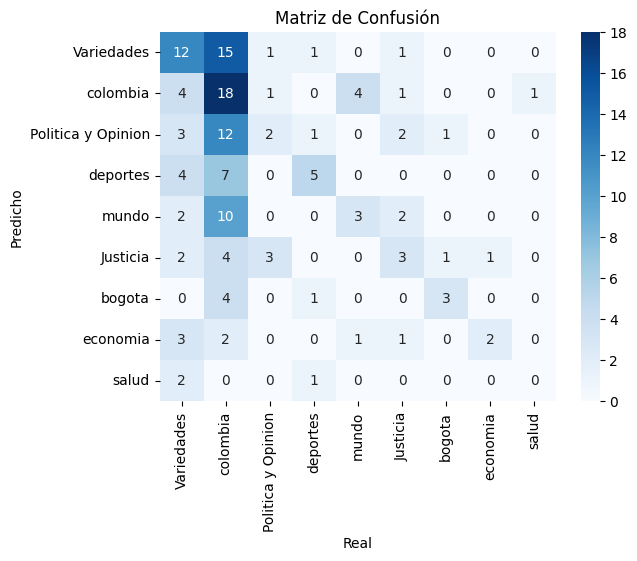

In [ ]:
from sklearn.neighbors import KNeighborsClassifier  # Se llama al algoritmo k-vecinos más cercano

mnbc = KNeighborsClassifier(n_neighbors=5, p=1, weights="distance") # Valor del hiperparametro para tomar dos vecinos más cercanos
mnbc
mnbc.fit(features_train, labels_train) # Se entrena el modelo
mnbc_pred = mnbc.predict(features_test) # Se usan los datos de prueba para probar el modelo.
print("The training accuracy is: ")
print(accuracy_score(labels_train, mnbc.predict(features_train))) #Se imprimen la precisión del modelo
# Classification report
print("Classification report")
print(classification_report(labels_test,mnbc_pred))

aux_df = DF[['Tipo', 'CodeCat']].drop_duplicates().sort_values('CodeCat') # Se crea la matriz de confusión
conf_matrix = confusion_matrix(labels_test, mnbc_pred)
plt.figure()
sns.heatmap(conf_matrix,
            annot=True,
            xticklabels=aux_df['Tipo'].values,
            yticklabels=aux_df['Tipo'].values,
            cmap="Blues")
plt.ylabel('Predicho')
plt.xlabel('Real')
plt.title('Matriz de Confusión')
plt.show()